In [630]:
# pip install scipy

In [648]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind_from_stats

In [649]:
df = pd.read_csv('project_data.csv')
df=df.dropna()
syntax_df = pd.read_csv('Langs_Syntax.csv')
commands_list = syntax_df['Command']
syntax_df.set_index('Command')
df.to_csv('project_data_Clean.csv')
syntax_df


,Command,C,Python,Swift,PHP,Ruby,Go,JavaScript,Csharp,Python3,Java
0,Comments,// /*,"# """"""",// /*,// # /*,# =begin,// /*,// /*,// /*,"# """"""",// /*
1,Conditions,if if( case ? else else{ else,if else else: elif,if else,if if( else,if unless else elseif,if if( case else else{ else,if if( case else else{ else,if if( case else else{ else,if else else: elif,if if( case ? else else{ else
2,For,for for(,for,for,for for( oreach( foreach,for,for,for for(,for for(,for,for for(
3,While,while while(,while while(,while,while while(,while,NaN,while while(,while while(,while while(,while while(
4,do ... while,do do{ do,NaN,repeat,do do{,loop until,NaN,do do{ do,do do{ do,NaN,do do{ do
5,Func dec,<return_type> <function_name>( <return_type> <...,def,func,function,def,func,function function(,<Access Specifier> <Return Type> <Method Name...,def,<return_type> <function_name>( <return_type> <...
6,Varibales Dec,double int char String string float boolean lo...,<var_name>= <var_name>,var let,$,$ @ @@ _,var,let,int char float double short,<var_name>= <var_name> =,double int char String float boolean long shor...
7,Pointers,double* int* char* String* float* boolean* lon...,NaN,NaN,NaN,NaN,var <name>*,NaN,NaN,NaN,double* int* char* String* float* boolean* lon...
8,Comments length,0,0,0,0,0,0,0,0,0,0
9,code length,0,0,0,0,0,0,0,0,0,0


In [650]:
print("num of rows:",df.shape[0])

num of rows: 1511


In [651]:
for i in syntax_df.index:
    if(pd.isnull(syntax_df['Command'][i])==True): continue
    new_col = syntax_df['Command'][i]
    df[new_col] = None
    
df['Variables Names'] = ''
df['Comments length'] = 0
df

,User_Name,User_img,User_url,Challange_Name,Programming_Lang,Sol_Code,User_Score,User's_Comments,User_Gender,Comments,Conditions,For,While,do ... while,Func dec,Varibales Dec,Pointers,Comments length,code length,Variables Names
0,TomGo,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/TomGo,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,10,5,Male,None,None,None,None,None,None,None,None,0,None,
2,buddhaben,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/buddhaben,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male,None,None,None,None,None,None,None,None,0,None,
4,sameerkhan2k1,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/sameerkhan2k1,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male,None,None,None,None,None,None,None,None,0,None,
10,moe123,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/moe123,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Female,None,None,None,None,None,None,None,None,0,None,
12,user60612276,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/user60612276,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male,None,None,None,None,None,None,None,None,0,None,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,bobsany16,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/bobsany16,SQL Member Count,Swift,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male,None,None,None,None,None,None,None,None,0,None,
2927,DanushiW,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/DanushiW,SQL Member Count,Swift,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male,None,None,None,None,None,None,None,None,0,None,
2930,selimfidan2314,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/selimfidan2314,SQL Member Count,Swift,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male,None,None,None,None,None,None,None,None,0,None,
2934,tomldac,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/tomldac,SQL Member Count,Swift,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male,None,None,None,None,None,None,None,None,0,None,


In [652]:
df[df['User_Gender']=='Female'].shape[0]

463

In [653]:
def find_lang_syntax(command,lang):
    syntax =[]
    Commands=syntax_df.loc[syntax_df['Command']==command, lang].to_string().split() ##finding comment syntax in c
    for com in Commands:
        syntax.append(com)
    return syntax

def Comments_counter(df, line, lang, row, syntax):############!111111111 להמשיייייייך!!!!!!!!!
    counter = 0
    for syn in syntax:
        if(syn=='0'): continue
        string = ''
        for letter in line:
            string = string+letter
            if(letter==' ' or letter=='\n' or letter=='\t'):
                string = ''
            else:
                if(string==syn):
                    counter += 1
                    length = 1
                    if(len(line)!=0): length = len(line)
                    df['Comments length'][row] += length
    return counter
                        
def Varibales_finder(df, line, lang, row, syntax):
    counter = 0
    index = 0
    var_list = []
    string = ''
    for letter in line:
        if(lang=='Python' or lang =='Python3'):
            if(letter == '='):
                let = line[index-1]
                let2 = line[index+1]
                if(let!='=' and let!='<'and let!='>'and let!='!' and let!='+' and let!='-' and let2!='='):
                    var_name = line.split()[0]
                    for word in line.split():
                        if(word!='='):
                            var_name = word
                        else:
                            if(var_name.find('(')==-1 and var_name.find(')')==-1):
                                counter += 1
                                var_list.append(var_name)
                                
        else: # lang != python/3
            string = string+letter
            if(letter==' ' or letter=='\n' or letter=='\t'):
                string = ''
            else:
                i=-1
                for syn in syntax:
                    i +=1
                    if(i==0): continue
                    if(string==syn):
                        var_name = line.split()[0]
                        for word in line.split():
                            if(word!='='):
                                var_name = word
                            else:
                                counter += 1
                                var_list.append(var_name)

        index +=1
    if (len(var_list)!=0 and var_list!=[]):
        df['Variables Names'][row]+=str(var_list).strip('[]')
    return counter

def count_commands(df, code, lang, syntax, command, row):

    counter = 0 # count num of comments
    string = ''
   
    for line in code.splitlines():
        if(command == 'Comments'):
            counter += Comments_counter(df, line, lang, row, syntax)
            continue
        if(command == 'Varibales Dec'):
            counter += Varibales_finder(df, line, lang, row, syntax)
            continue
        for letter in line: #for every code in c
            string = string+letter
            if(letter==' ' or letter=='\n' or letter=='\t'):
                string = ''
            else:
                i=-1
                for syn in syntax:
                    i +=1
                    if(i==0): continue
                    if(string==syn):
                        counter +=1
#             index += 1
    return counter

In [665]:
for i in df.index:
    user_code = df['Sol_Code'][i]
    code_lang = df['Programming_Lang'][i]
    for col in commands_list:
        if(pd.isna(col)==True): continue
        if(col!='code length'):
            Relative_Syntax = find_lang_syntax(col,code_lang)
            df[col][i]=count_commands(df, user_code, code_lang, Relative_Syntax, col, i)
        else:
            df[col][i] = len(df['Sol_Code'][i].split())-(df['Comments length'][i])

<ipython-input-653-c07e35acddb1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comments length'][row] += length
<ipython-input-665-e8c406a72fe1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=count_commands(df, user_code, code_lang, Relative_Syntax, col, i)
<ipython-input-653-c07e35acddb1>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Variables Names'][row]+=str(var_list).strip('[]')
<ipython-input-665-e8c

In [673]:

df.to_csv("project_data_syntax_commands.csv")

In [674]:
df
###### note: the comment's and code's langth are by words, not by character!!

,User_Name,User_img,User_url,Challange_Name,Programming_Lang,Sol_Code,User_Score,User's_Comments,User_Gender,Comments,Conditions,For,While,do ... while,Func dec,Varibales Dec,Pointers,Comments length,code length,Variables Names
0,TomGo,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/TomGo,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,10,5,Male,1,3,2,0,0,0,7,0,2,113,"'N''K''min''result''match', 'match''index''N''..."
2,buddhaben,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/buddhaben,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male,2,4,2,0,0,0,6,0,1,110,"'result', 'result''temp', 'temp''n''result''re..."
4,sameerkhan2k1,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/sameerkhan2k1,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male,4,1,4,1,0,0,8,0,2,135,"'a', 'a''m''l''r''b', 'b''k''a', 'a''m''l''r''..."
10,moe123,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/moe123,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Female,3,2,3,1,0,0,15,0,8,191,"'fr', 'fr2', 'fr', 'fr2', 'fr', 'fr2''s1', 's2..."
12,user60612276,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/user60612276,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male,1,3,3,0,0,0,10,0,6,172,'requiredCounts''nonZeroCounts''minLen''start'...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,bobsany16,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/bobsany16,SQL Member Count,Swift,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male,1,0,0,0,0,0,0,0,0,26,
2927,DanushiW,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/DanushiW,SQL Member Count,Swift,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male,1,0,0,0,0,0,0,0,0,29,
2930,selimfidan2314,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/selimfidan2314,SQL Member Count,Swift,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male,1,0,0,0,0,0,0,0,1,24,
2934,tomldac,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/tomldac,SQL Member Count,Swift,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male,1,0,0,0,0,0,0,0,0,28,


In [675]:
Female_df = df[df.User_Gender == 'Female']
Male_df = df[df.User_Gender == 'Male']

In [676]:
Female_df.shape

(463, 20)

In [677]:
ind = ['Male','Female']
comm = syntax_df.Command.to_list()
gender_df = pd.DataFrame(index = ind, columns=comm)
gender_df
for Command in gender_df.columns:
    if(pd.isnull(Command)): continue
    gender_df[Command]['Female'] = Female_df[Command].mean()/ Female_df[Command].std()
    gender_df[Command]['Male'] = Male_df[Command].mean()/ Male_df[Command].std()
gender_df = gender_df.T

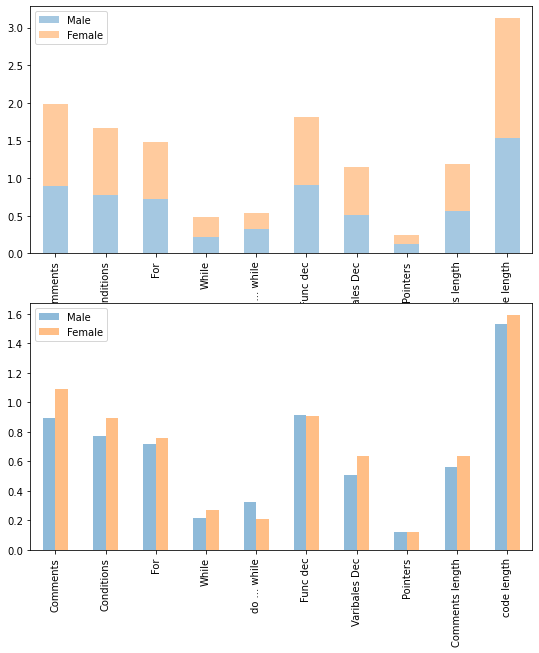

In [678]:
fig, axes = plt.subplots(nrows=2, figsize=(9, 10))
gender_df.plot(kind='bar', stacked=False, alpha=0.5, ax=axes[1])
gender_df.plot(kind='bar', stacked=True, alpha=0.4, ax=axes[0])
for ax in axes:
    ax.set_ylim(bottom=0)
    print('\n')

In [ ]:
### scipy


In [ ]:
help(ttest_ind_from_stats)